In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('Wisconsin.csv')

In [3]:
data.shape

(569, 32)

In [4]:
# droping the id column since it's irrelevant
data.drop('id', axis = 1, inplace = True)

In [5]:
data.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


assigning:
* M as Maligant Tumor to 1
* B as Benign Tumor to 0

In [7]:
df = data.copy()

In [8]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

For indexing purposes, separating the features in 3 distinct categories:
* feature_mean
* feature_se (standard error)
* feature_worst 

In [190]:
features_mean = df.columns[1:11]
features_se = df.columns[11:21]
features_worst = df.columns[21:31]
allfeatures = df.columns[1:]
print(features_mean)
print(features_se)
print(features_worst)

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
      dtype='object')
Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se'],
      dtype='object')
Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


# Exploratory Data Analysis

1. Diagnosis Distribution

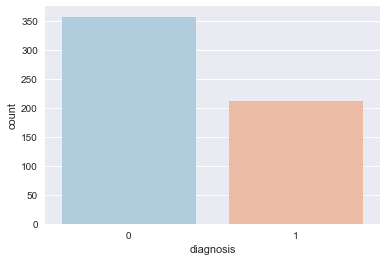

In [184]:
sns.countplot(x = 'diagnosis', data = df, palette ='RdBu_r')

In [185]:
df.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


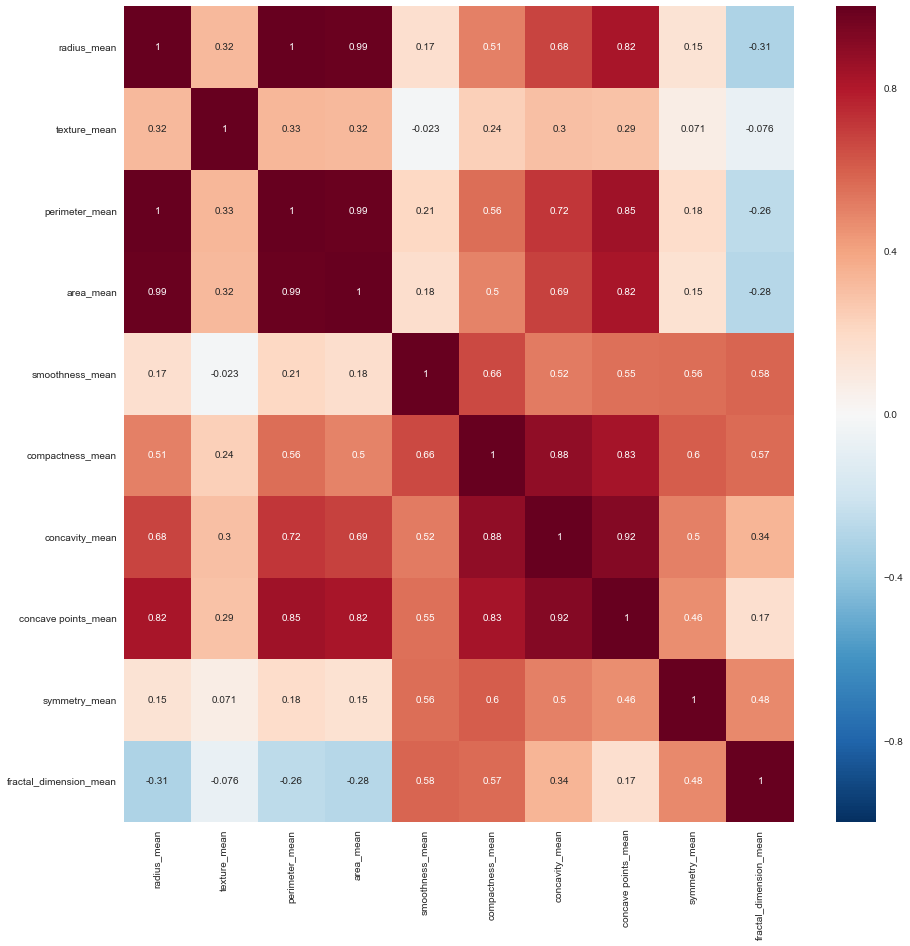

In [78]:
plt.figure(figsize=(15,15))
sns.heatmap(df[features_mean].corr(), annot=True)

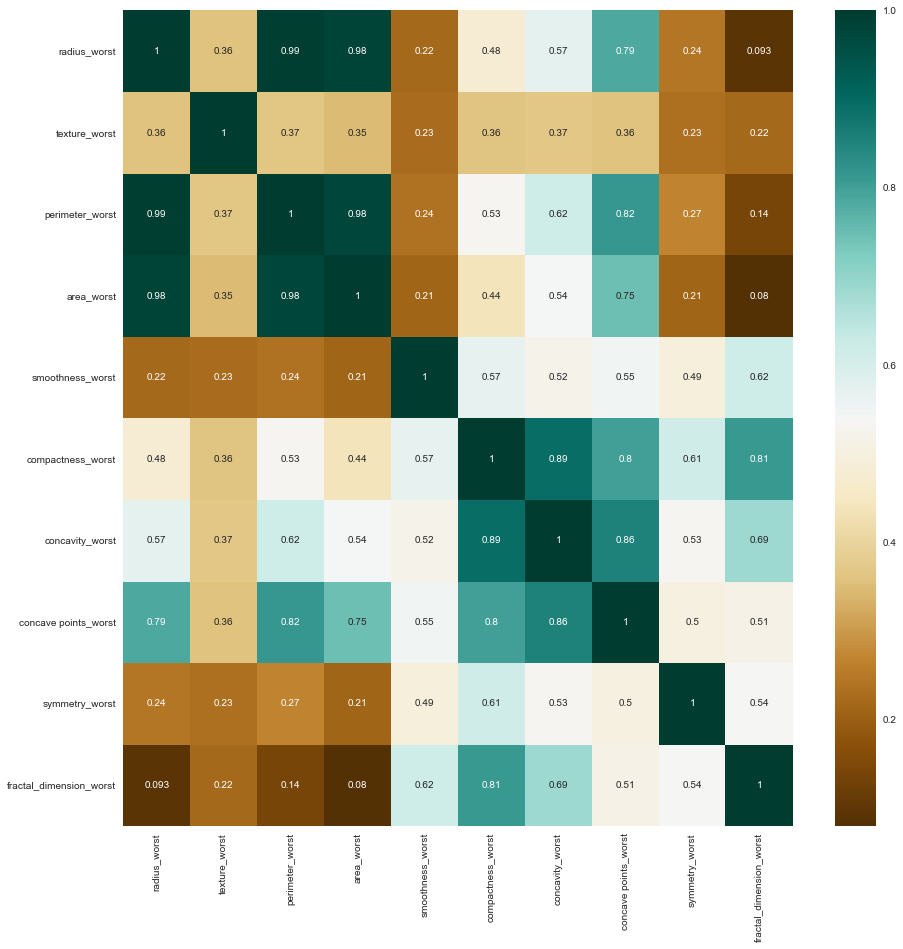

In [81]:
plt.figure(figsize=(15,15))
sns.heatmap(df[features_worst].corr(), annot=True, cmap='BrBG')

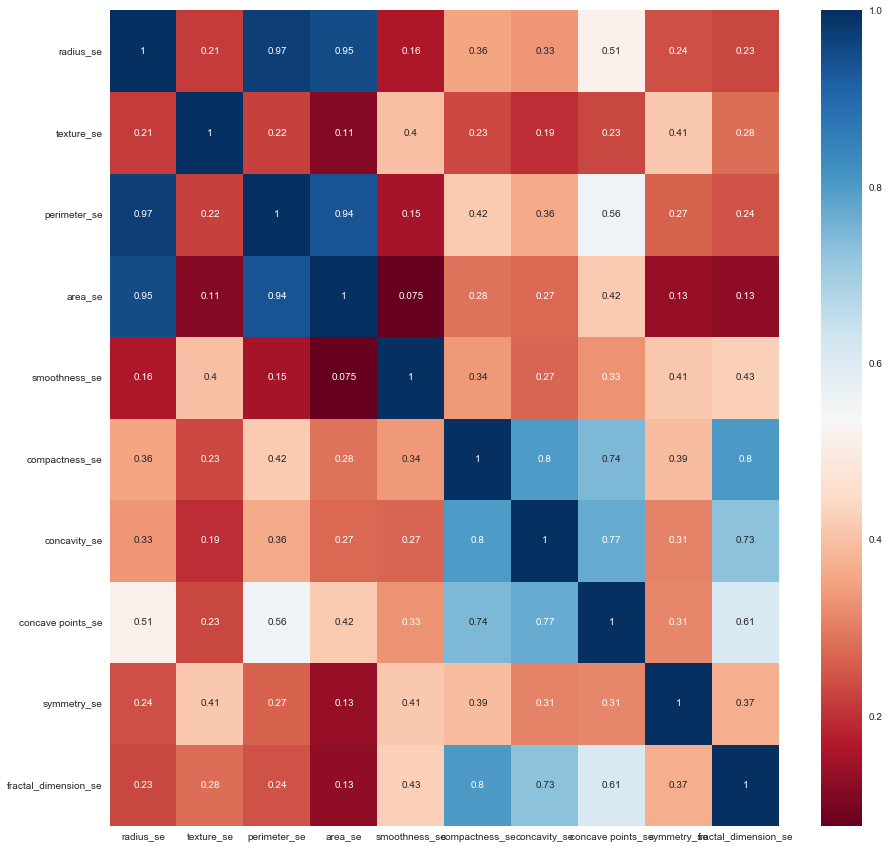

In [82]:
plt.figure(figsize=(15,15))
sns.heatmap(df[features_se].corr(), annot=True, cmap='RdBu')

Above heatmaps shows high correlation between certain features in all three cases, as follows:
* High correlation between 'radius', 'area', and 'perimeter'
* Relatively high correlation between 'compactness', 'concavity', and 'concave points'

I'll go ahead and remove features with more than .9 correlation, which are:
- perimeter_mean, perimeter_se, perimeter_worst
- area_mean, area_se, area_worst
- concave points_mean

Now let's see the correlation in features for each case 'mean', 'se', 'worst'

In [197]:
features_mean_2 = features_mean.drop(['perimeter_mean','area_mean','concave points_mean'])
features_se_2 = features_se.drop(['perimeter_se', 'area_se'])
features_worst_2 = features_worst.drop('perimeter_worst')
allfeatures_2 = allfeatures.drop(['perimeter_mean','area_mean', 'concave points_mean',
                                  'perimeter_se', 'area_se','perimeter_worst'])

In [198]:
# a feature list made in order to compare each feature in the 3 cases of 'mean', 'se', and 'worst'
features_cat = []
columns_list = np.array(allfeatures)
gen = ([i, i+10, i+20] for i in range(10))
for x in gen:
    features_cat.append(columns_list[x].tolist())

In [200]:
# let's try it out for the radius
df[features_cat[3]].describe()

,area_mean,area_se,area_worst
count,569.000000,569.000000,569.000000
mean,654.889104,40.337079,880.583128
std,351.914129,45.491006,569.356993
min,143.500000,6.802000,185.200000
25%,420.300000,17.850000,515.300000
50%,551.100000,24.530000,686.500000
75%,782.700000,45.190000,1084.000000
max,2501.000000,542.200000,4254.000000


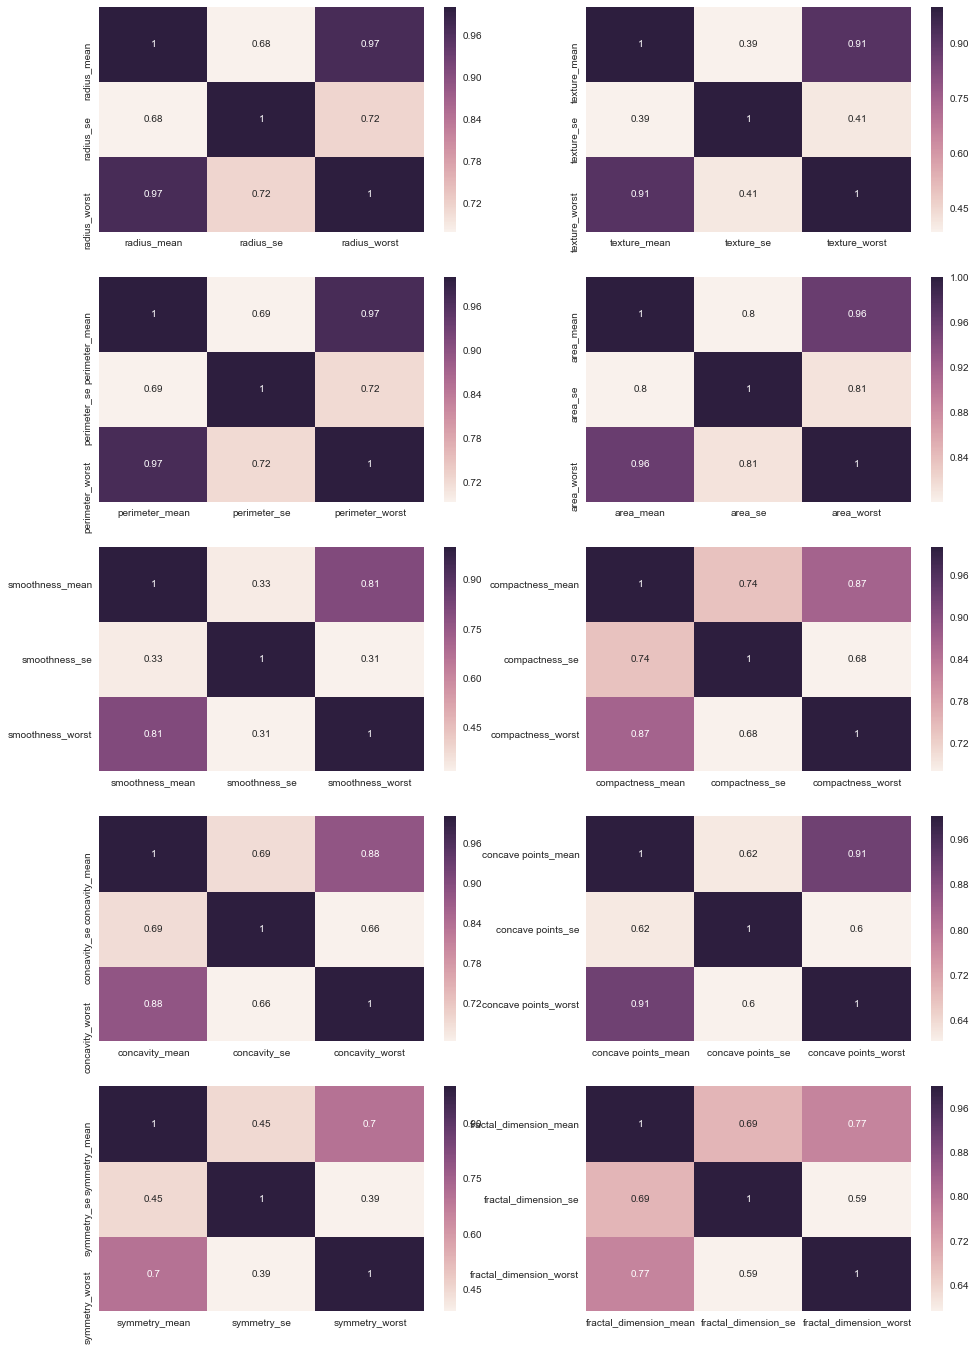

In [211]:
plt.figure(figsize=(16,24))
for i in range(10):
    plt.subplot(5,2,i+1)
    sns.heatmap(df[feature_list[i]].corr(), annot=True)

above heatmaps shows correlation between 'mean' case and the 'worst' case of the following features:
* radius

In [168]:
df[feature_list[0]].head()

,radius_mean,radius_se,radius_worst
0,17.99,1.0950,25.38
1,20.57,0.5435,24.99
2,19.69,0.7456,23.57
3,11.42,0.4956,14.91
4,20.29,0.7572,22.54


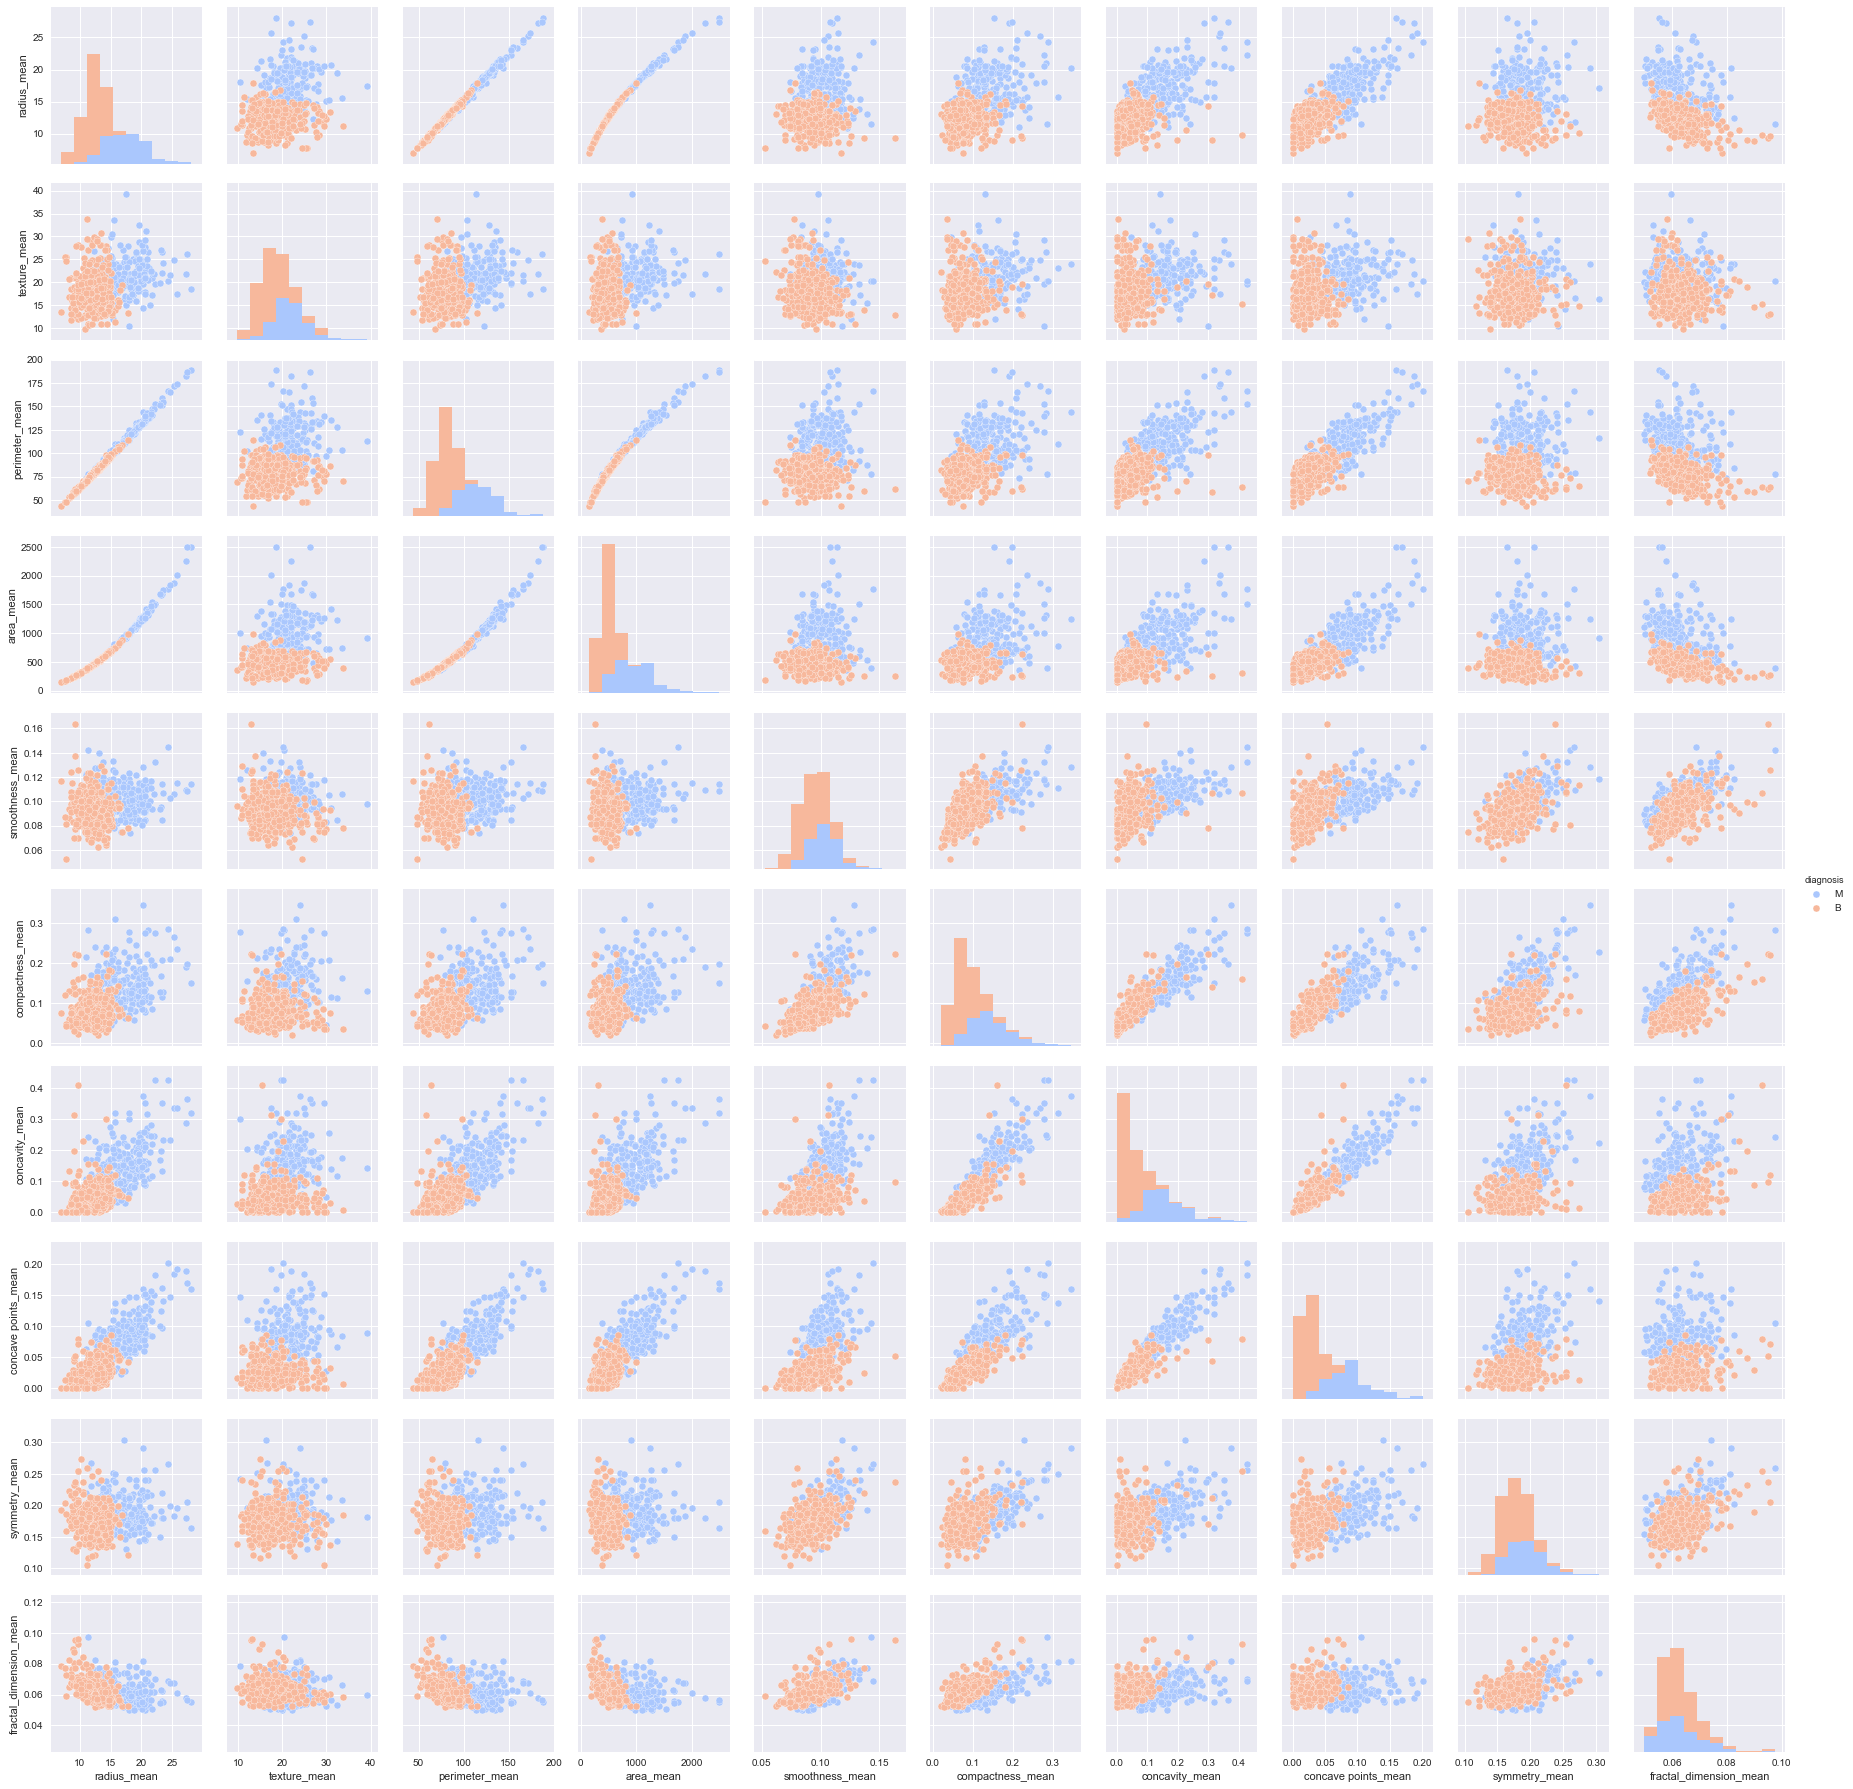

In [13]:
plt.figure(figsize=(15,15))
sns.pairplot(pd.concat([data.diagnosis,df[feature_mean]], axis = 1), hue= 'diagnosis', palette='coolwarm')

In [ ]:
# Some remarks:
# 1. Database is biased to having more benign(zeros) than malignant(ones) tumors
# 2. 

# Train Test Split

In [14]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [16]:
X = df[df.columns[1:]]

In [17]:
X.shape

(569, 30)

In [18]:
y = df['diagnosis']

In [19]:
y.shape

(569,)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3)

In [21]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(398, 30) (171, 30) (398,) (171,)
